#### Submitted by 
- Noor Ul Huda 23i2099 bsds - 3b
- Malaika Zainab 23i2605 bsds - 3b

# Module 1: Data Acquisition and Preprocessing:

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans


## 1. Data Acquisition:

### Reading the .json file

In [107]:
df = pd.read_json('electronics.json')
df.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter,1
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall,1
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter,1
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall,1
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer,1


In [108]:
df.tail()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month
995,,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180,92,2,5,Medium,05,1987,Fall,1
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,09,1977,Winter,1
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,Hidden,8b6ffec8-de54-445c-90d0-1399858b2e16,Hidden,Brand_C,212,99,2,9,Low,12,1995,Summer,1
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,Hidden,98,8,7,Low,03,2000,,1
999,87629baf-a138-4374-be37-8bab776379b8,19,Other,High,"896 Troy Branch\nAmytown, NJ 62321",69afa592-2658-48ac-9b37-33a3a473d0be,2022-09-13,91ba2109-15aa-40a0-aa9c-732a1e2e1e27,Clothing,Brand_B,208,12,10,1,Medium,12,1970,Summer,1


In [109]:
df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    1000 non-null   object
 1   Age                            1000 non-null   object
 2   Gender                         1000 non-null   object
 3   Income_Level                   1000 non-null   object
 4   Address                        1000 non-null   object
 5   Transaction_ID                 1000 non-null   object
 6   Purchase_Date                  1000 non-null   object
 7   Product_ID                     1000 non-null   object
 8   Product_Category               1000 non-null   object
 9   Brand                          1000 non-null   object
 10  Purchase_Amount                1000 non-null   object
 11  Average_Spending_Per_Purchase  1000 non-null   object
 12  Purchase_Frequency_Per_Month   1000 non-null   object
 13  Bran

## 2. Data Cleaning:

### Handling missing values:

In [110]:
print("Missing values are:")  #checking to see if there are any missing values 
print(df.isnull().sum())

Missing values are:
Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Address                          0
Transaction_ID                   0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
Will_Purchase_Next_Month         0
dtype: int64


### Converting Data
the null values seem to be zero, however in the data set, we can see empty strings and "hidden" values.
as all data types are 'object', we convert required columns into appropriatre data types

In [111]:
#selecting required numeric cols for statistical analysis
numeric_columns = ['Purchase_Amount', 'Average_Spending_Per_Purchase', 
                   'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']  
print(df[numeric_columns].isnull().sum())
print(df[numeric_columns].dtypes)

Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
dtype: int64
Purchase_Amount                  object
Average_Spending_Per_Purchase    object
Purchase_Frequency_Per_Month     object
Brand_Affinity_Score             object
dtype: object


### Converting numeric data to numeric type

In [112]:
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') 
    
print(df[numeric_columns].dtypes)

print(df[numeric_columns].isnull().sum())



Purchase_Amount                  float64
Average_Spending_Per_Purchase    float64
Purchase_Frequency_Per_Month     float64
Brand_Affinity_Score             float64
dtype: object
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
dtype: int64


### Handling missing values 

In [113]:
df['Purchase_Frequency_Per_Month'] = df['Purchase_Frequency_Per_Month'].replace(np.nan, df['Purchase_Frequency_Per_Month'].mode()[0])
df['Brand_Affinity_Score'] = df['Brand_Affinity_Score'].fillna(df['Brand_Affinity_Score'].mode()[0])
df['Average_Spending_Per_Purchase'] = df['Average_Spending_Per_Purchase'].fillna(df['Average_Spending_Per_Purchase'].mean()) 
df['Purchase_Amount'] = df['Purchase_Amount'].fillna(df['Purchase_Amount'].mean()) 

print(df[numeric_columns].isnull().sum())

Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
dtype: int64


### -> Handling outliers:

In [114]:
def calculate_iqr_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

for col in ['Average_Spending_Per_Purchase', 'Purchase_Amount']:  #replace with mean values 
    mean_value = df[col].mean()
    lower_avg, upper_avg = calculate_iqr_bounds(df, col)
    df[col] = df[col].where((df[col] >= lower_avg) & (df[col] <= upper_avg),mean_value)

for col in ['Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']: #replace with mode value 
    mode_value = df[col].mode()[0]   
    lower_count, upper_count = calculate_iqr_bounds(df, col)

    df[col] = df[col].where((df[col] >= lower_count) & (df[col] <= upper_count),mode_value)

### Checking duplicates

In [115]:
print('duplicates')
dup = df[df.duplicated()]
print(dup)
#there are no dulicates -> empty data frame

duplicates
Empty DataFrame
Columns: [Customer_ID, Age, Gender, Income_Level, Address, Transaction_ID, Purchase_Date, Product_ID, Product_Category, Brand, Purchase_Amount, Average_Spending_Per_Purchase, Purchase_Frequency_Per_Month, Brand_Affinity_Score, Product_Category_Preferences, Month, Year, Season, Will_Purchase_Next_Month]
Index: []


### Statistical Analysis of Numeric data

In [116]:
numeric_df = df.select_dtypes(include=['float64', 'int32', 'int8', 'int64'])
numeric_df.describe()


,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Will_Purchase_Next_Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,250.629863,51.603125,5.303000,5.164000,0.86800
std,137.515156,26.556676,2.821197,2.871123,0.33866
min,10.000000,5.000000,1.000000,1.000000,0.00000
25%,137.000000,30.000000,3.000000,2.000000,1.00000
50%,250.629863,51.301563,5.000000,5.000000,1.00000
75%,369.000000,73.250000,8.000000,8.000000,1.00000
max,500.000000,100.000000,10.000000,10.000000,1.00000


### -> Handling empty strings/Hidden:

In [117]:
non_numeric_columns = df.columns.difference(numeric_columns)
# Replace empty strings with NaN in non-numeric columns
df[non_numeric_columns] = df[non_numeric_columns].replace("", np.nan)
df = df.replace("Hidden", np.nan)
df = df.dropna()

In [118]:
print(f"Number of rows after dropping NaN: {len(df)}")

Number of rows after dropping NaN: 487


In [119]:
# Check for remaining occurrences of "Hidden"
print(df[df.isin(["Hidden"]).any(axis=1)])

Empty DataFrame
Columns: [Customer_ID, Age, Gender, Income_Level, Address, Transaction_ID, Purchase_Date, Product_ID, Product_Category, Brand, Purchase_Amount, Average_Spending_Per_Purchase, Purchase_Frequency_Per_Month, Brand_Affinity_Score, Product_Category_Preferences, Month, Year, Season, Will_Purchase_Next_Month]
Index: []


## 3. Data Transformation:

### Brand Loyalty Analysis

- **Purpose:** Identify the brand most frequently purchased by each customer to understand their preferences and loyalty.
- **Steps:**
  1. Calculate the proportion of purchases for each brand per customer.
  2. Assign the most frequently purchased brand as the customer's "Brand Loyalty."
- **Benefits:**
  - Helps in tailoring personalized marketing campaigns.
  - Enables segmentation of customers based on brand affinity.
  - Supports the development of effective loyalty programs.
  - Aids in identifying opportunities to convert low-loyalty customers into loyal ones.
- **Outcome:** Insights into customer-brand relationships, leading to improved engagement and business strategies.

In [120]:
brand_loyalty = df.groupby('Customer_ID')['Brand'].value_counts(normalize=True).unstack().fillna(0)
df['Brand_Loyalty'] = df['Customer_ID'].map(lambda x: brand_loyalty.loc[x].idxmax())

print(df['Brand_Loyalty'])
null_values_count = df['Brand_Loyalty'].isnull().sum()

print(f"Number of null values in 'Brand_Loyalty': {null_values_count}")


0      Brand_C
3      Brand_C
4      Brand_B
5      Brand_A
7      Brand_A
        ...   
988    Brand_B
989    Brand_B
993    Brand_C
996    Brand_B
999    Brand_B
Name: Brand_Loyalty, Length: 487, dtype: object
Number of null values in 'Brand_Loyalty': 0


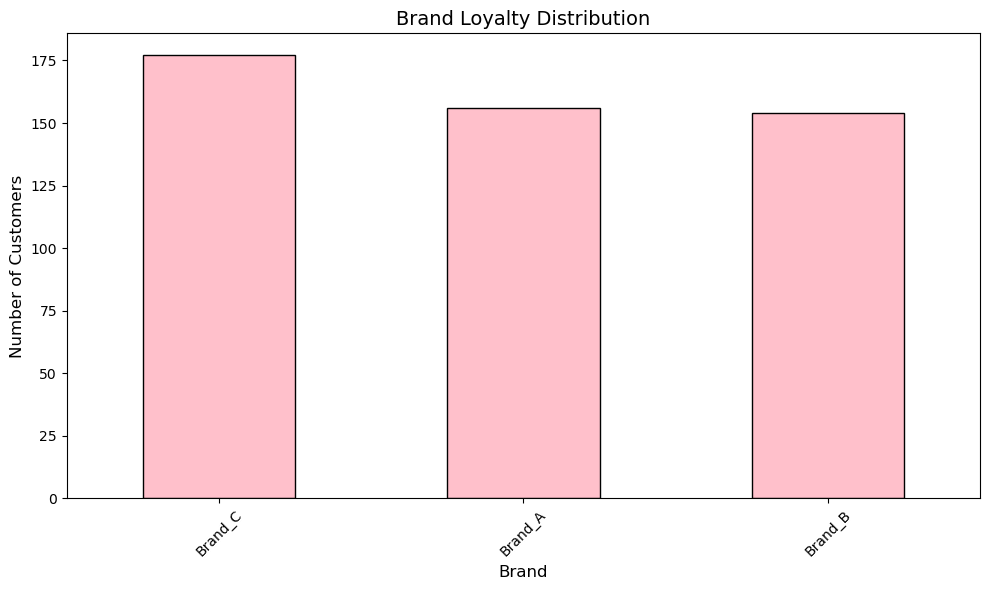

In [121]:
brand_counts = df['Brand_Loyalty'].value_counts()
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Brand Loyalty Distribution', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Age Group Analysis

- **Purpose:** Segment customers into meaningful age groups to analyze demographic trends and preferences.
- **Steps:**
  1. **Data Cleaning:**
     - Convert the `Age` column to numeric, handling any non-numeric values.
     - Remove rows with missing or invalid age data.
  2. **Age Group Creation:**
     - Categorize customers into four age groups: *Youth (0–25 years)*, *Adult (26–50 years)*, *Senior (51–75 years)*, and *Elder (76–100 years)*.
  3. **Visualization:**
     - Generate a bar chart to display the distribution of customers across these age groups.
- **Benefits:**
  - Identifies key customer demographics.
  - Helps in targeting specific age groups with tailored marketing strategies.
  - Facilitates deeper insights into purchasing behaviors of different age segments.
- **Outcome:** Clear visualization of customer age distribution, aiding strategic decision-making for age-specific product or service offerings.

Age Groups:
Age_Group
Senior    196
Adult     176
Youth      68
Elder      47
Name: count, dtype: int64


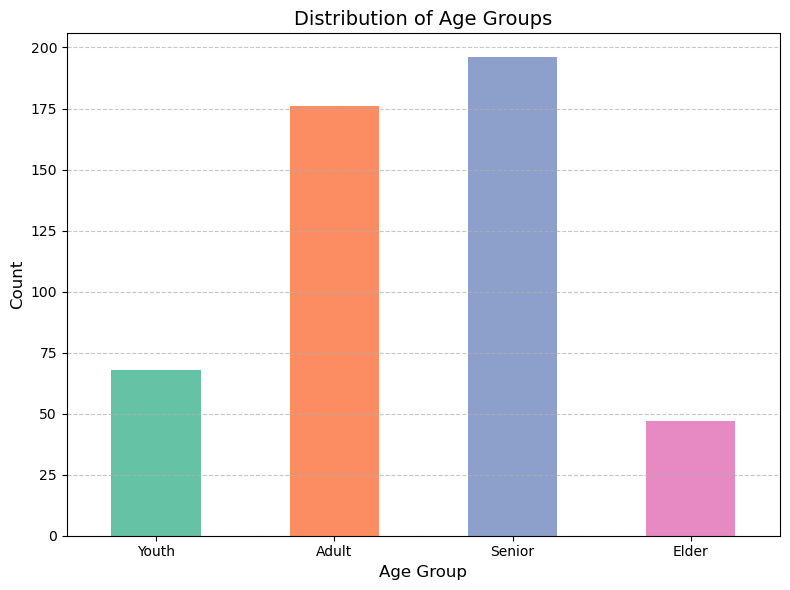

In [122]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') #convert age to numeric 
df = df.dropna(subset=['Age'])  

df['Age_Group'] = pd.cut(df['Age'].astype(int), bins=[0, 25, 50, 75, 100], labels=['Youth', 'Adult', 'Senior', 'Elder']) #age groups


print("Age Groups:")
print(df['Age_Group'].value_counts())

age_group_counts = df['Age_Group'].value_counts().sort_index()  
age_group_counts.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], figsize=(8, 6))

plt.title("Distribution of Age Groups", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Normalization

In [123]:
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df[numeric_columns].head()

,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score
0,0.373469,0.568421,0.111111,0.111111
3,0.514286,0.968421,0.222222,0.333333
4,0.855102,0.842105,0.666667,0.111111
5,0.095918,0.168421,0.111111,0.555556
7,0.775510,0.389474,0.888889,0.111111


# Module 2: Exploratory Data Analysis (EDA):

## 1. Univariate Analysis:

### Interpretation of the Histograms

The three histograms display the distribution of key customer metrics:

1. **Customer Age Distribution:**
   - The age distribution is relatively uniform across a wide range, with peaks around younger and older adults.
   - This indicates a diverse customer base, with representation from multiple age groups.

2. **Purchase Amount Distribution:**
   - The purchase amount follows a skewed distribution, with most purchases clustered around lower amounts.
   - A smaller proportion of customers make high-value purchases, which may indicate premium buyers.

3. **Purchase Frequency Per Month Distribution:**
   - Most customers make purchases with a frequency around 0.2–0.4 per month.
   - A few customers exhibit higher purchase frequency, potentially indicating loyal or high-engagement customers.

### Plotting Histograms 

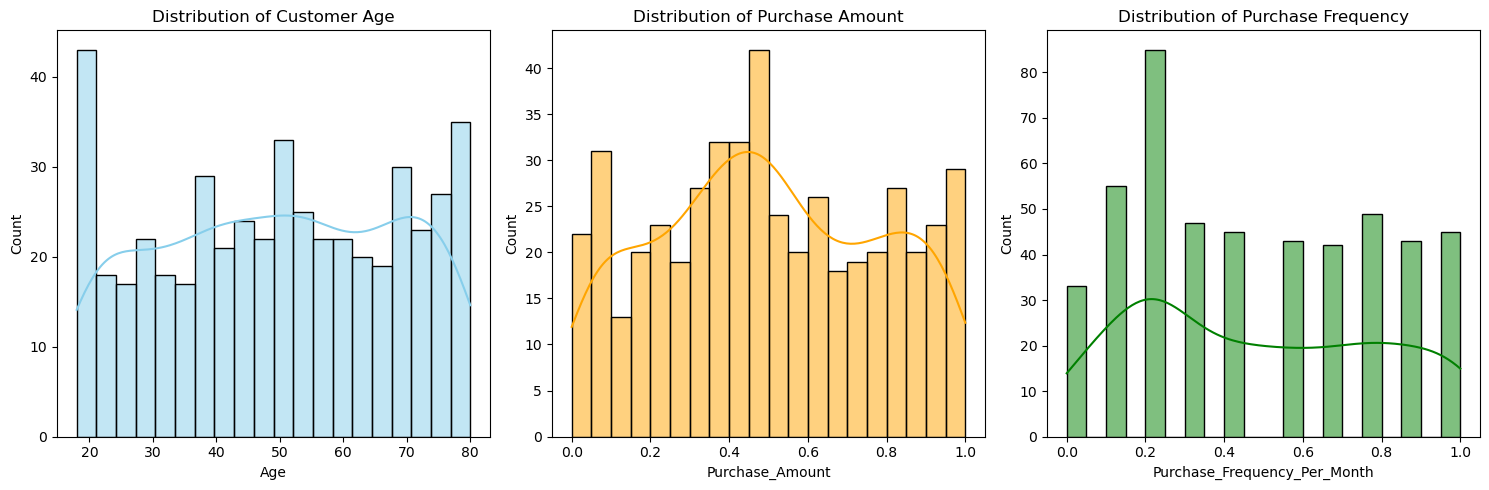

In [124]:
plt.figure(figsize=(15, 5))

# Plot for Customer Age
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')

# Plot for Purchase Amount
plt.subplot(1, 3, 2)
sns.histplot(df['Purchase_Amount'], bins=20, kde=True, color='orange')
plt.title('Distribution of Purchase Amount')

# Plot for Purchase Frequency
plt.subplot(1, 3, 3)
sns.histplot(df['Purchase_Frequency_Per_Month'], bins=20, kde=True, color='green')
plt.title('Distribution of Purchase Frequency')


plt.tight_layout()
plt.show()



### Interpretation of the Boxplots

The three boxplots provide a summary of the key customer metrics:

1. **Customer Age Boxplot:**
   - The age distribution appears fairly symmetrical, with the median around 40 years.
   - The interquartile range (IQR) spans from around 18 to 60 years, showing that most customers are between these ages.
   - There are some potential outliers on the higher end, indicating a few older customers.

2. **Purchase Amount Boxplot:**
   - The purchase amount distribution is heavily skewed, with the majority of values clustered near the lower end.
   - The median is quite close to the lower range, suggesting that most customers make lower-value purchases.
   - The presence of outliers indicates some customers who make very high-value purchases.

3. **Purchase Frequency Boxplot:**
   - The frequency of purchases per month shows a fairly tight distribution with a median around 0.4.
   - The IQR is between 0 and 0.8, which shows that most customers make few purchases each month.
   - Similar to the other metrics, a few outliers at higher frequencies suggest some customers are highly engaged.

### Plotting Box plots 

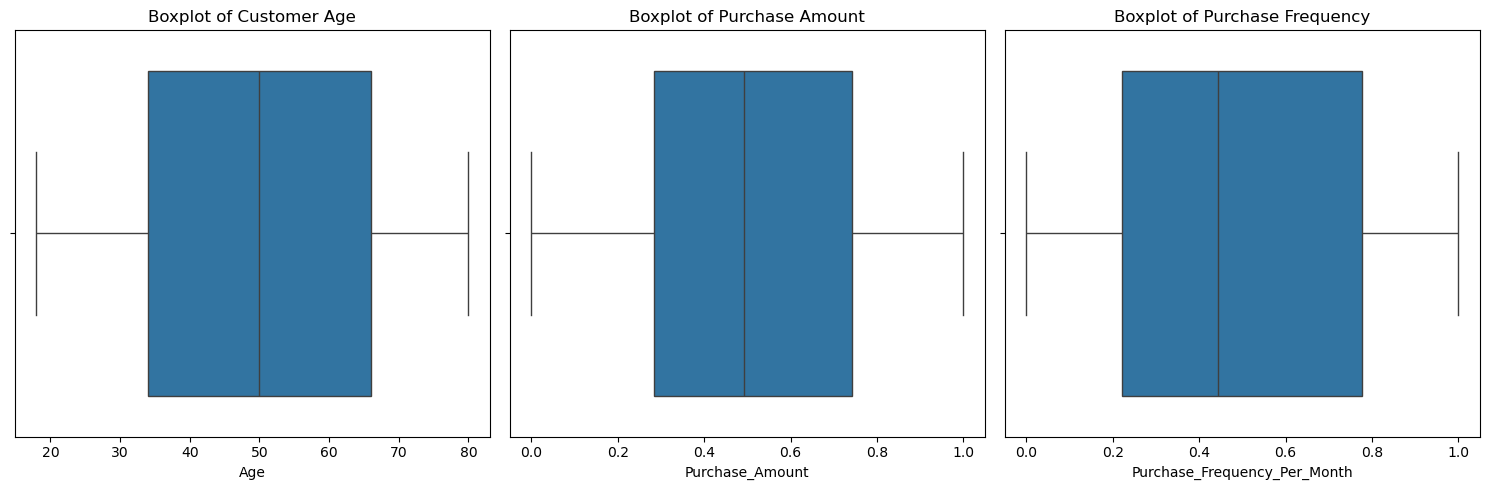

In [125]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Customer Age')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Purchase_Amount'])
plt.title('Boxplot of Purchase Amount')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Purchase_Frequency_Per_Month'])
plt.title('Boxplot of Purchase Frequency')

plt.tight_layout()
plt.show()

### Descriptive Statistics

In [126]:
desc_stats = df[['Age', 'Purchase_Amount', 'Purchase_Frequency_Per_Month']].describe()
print(desc_stats)

              Age  Purchase_Amount  Purchase_Frequency_Per_Month
count  487.000000       487.000000                    487.000000
mean    49.605749         0.498940                      0.480265
std     18.610713         0.282001                      0.311688
min     18.000000         0.000000                      0.000000
25%     34.000000         0.283673                      0.222222
50%     50.000000         0.491081                      0.444444
75%     66.000000         0.741837                      0.777778
max     80.000000         1.000000                      1.000000


# Bivariate Analysis:

### Bivariate analysis between Purchase Amount and Income level 

- High-income individuals demonstrate the highest average purchase frequency, followed by Medium-income individuals.
- Low-income individuals show the lowest average purchase frequency.

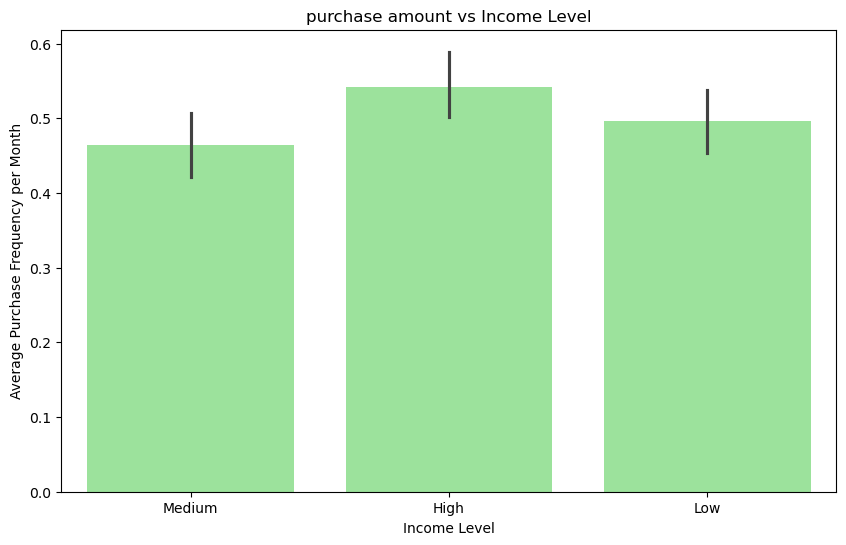

In [127]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Income_Level', y='Purchase_Amount', color='lightgreen')

plt.title('purchase amount vs Income Level')
plt.xlabel('Income Level')
plt.ylabel('Average Purchase Frequency per Month')

plt.show()


### Bivarite Analysis between Age group and Averge Spending 

- Youth account for the highest spending, contributing 27.2% to the total average spending.
- Adults follow closely with 25.4%.
- Seniors and Elders have similar spending patterns, with 24.1% and 23.3%, respectively.

C:\Users\HP\AppData\Local\Temp\ipykernel_3200\1618232492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending_by_age_group = df.groupby('Age_Group')['Average_Spending_Per_Purchase'].mean()


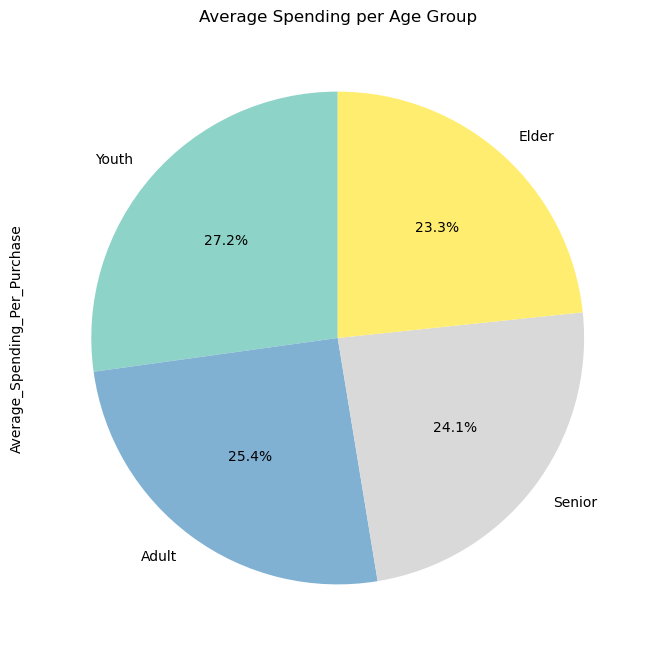

In [128]:
avg_spending_by_age_group = df.groupby('Age_Group')['Average_Spending_Per_Purchase'].mean()


plt.figure(figsize=(8, 8))
avg_spending_by_age_group.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')


plt.title('Average Spending per Age Group')


plt.show()


### Correlation Matrix:


### **1.Age**
- **Self-correlation**: 1.00
- **Weak correlations**:
  - Positive: Slightly correlated with **Brand Affinity Score (0.11)**, suggesting older individuals might have slightly stronger brand preferences.
  - Negative: Weakly inversely related to **Product Category Preferences (-0.07)** and **Average Spending Per Purchase (-0.07)**.
- **Insights**: Age has weak influence on purchasing behavior variables
  
### **2. Gender**
- **Self-correlation**: 1.00
- **Minimal correlations**: Very low correlation with all variables.
- **Insights**: Gender does not significantly influence purchase-related metrics in this dataset.

### **3. Product Category**
- **Self-correlation**: 1.00.
- **Low correlations**:
  - Positive: Related to **Product Category Preferences (0.11)**.
  - Weak negative: Inversely related to **Season (-0.06)** and **Will Purchase Next Month (-0.13)**.
- **Insights**: The type of product category is weakly related to customer preferences.

### **4. Purchase Amount**
- **Self-correlation**: 1.00.
- **Minimal correlations**: Not strongly correlated with any other variable.
- **Insights**: Purchase amounts are weakly related to age, preferences, or frequency metrics.

### **5. Average Spending Per Purchase**
- **Self-correlation**: 1.00.
- **Low correlations**:
  - Positive: Negligible correlation with most variables.
  - Negative: Slight inverse correlation with **Brand Affinity Score (-0.11)**.
- **Insights**: High spending per purchase might indicate less frequency or loyalty to a specific brand.

### **6. Purchase Frequency Per Month**
- **Self-correlation**: 1.00.
- **Moderate correlations**:
  - Positive: Moderately correlated with **Will Purchase Next Month (0.46)**. Regular purchasers are more likely to continue purchasing.
  - Minimal impact from other variables.
- **Insights**: Purchase frequency is a better predictor of future purchases compared to other varables.

### **7. Brand Affinity Score**
- **Self-correlation**: 1.00.
- **Moderate correlations**:
  - Positive: Linked to **Will Purchase Next Month (0.46)**, suggesting brand loyalty increases future purchase likelihood.
  - Negative: Weak negative correlation with **Average Spending Per Purchase (-0.11)**.
- **Insights**: High brand affinity encourages repeat purchases but might reduce the average spend per transaction.

### **8. Product Category Preferences**
- **Self-correlation**: 1.00.
- **Minimal correlations**:
  - Positive: Correlated with **Product Category (0.11)**, indicating some consistency in customer preferences.
- **Insights**: Preferences are product-specific.

### **9. Month**
- **Self-correlation**: 1.00.
- **Low correlations**:
  - Slightly correlated with **Season (0.09)**.
- **Insights**: Seasonal trends (e.g., holidays) might influence sales.

### **10. Season**
- **Self-correlation**: 1.00.
- **Minimal correlations**:
  - Positive: Weak link to **Month (0.09)**.
- **Insights**: Seasonality might affect some purchasing behavior, but its impact on other variables is negligible here.

### **11. Will Purchase Next Month**
- **Self-correlation**: 1.00.
- **Key correlations**:
  - Positive:
    - **Purchase Frequency Per Month (0.46)**: Frequent buyers are more likely to purchase again.
    - **Brand Affinity Score (0.46)**: Brand loyalty is a significant predictor of future purchases.
  - Negative:
    - Weak negative correlation with **Product Category (-0.13)**.
- **Insights**: **Purchase frequency and brand affinity** are the strongest predictors of future purchasing behavior.

### SUMMARY 
- **Strongest Predictors for "Will Purchase Next Month"**:
  - **Purchase Frequency Per Month** and **Brand Affinity Score** (both at 0.46).

- **Weak Predictors**:
  - Variables like **Age**, **Gender**, and **Season** have negligible influence on purchasing behavior.


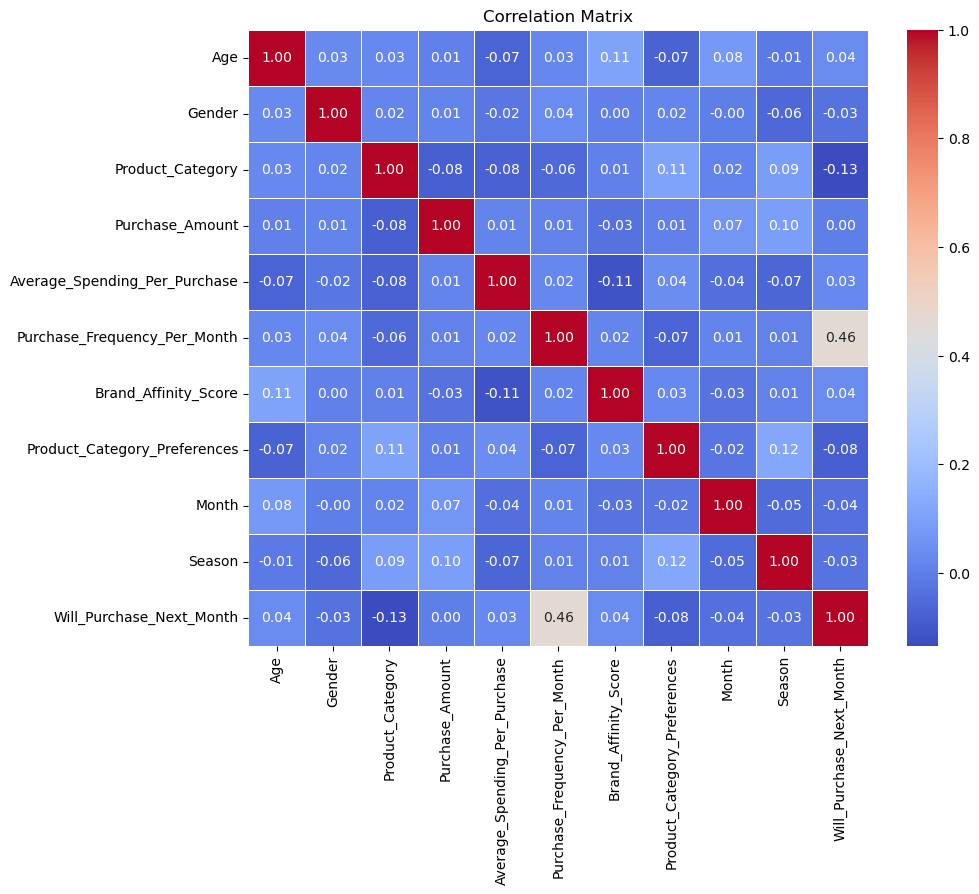

In [129]:
df['Product_Category'] = df['Product_Category'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Product_Category_Preferences'] = df['Product_Category_Preferences'].astype('category').cat.codes
df['Month'] = df['Month'].astype('category').cat.codes
df['Season'] = df['Season'].astype('category').cat.codes

numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Temporal Analysis

### Analysis of trends in customer behaviour over time

- performing feature engineering by creating additional columns that break down the Purchase_Date into more time-based features.
- These new features (Year, Month, Day_of_Week, Quarter) can help in temporal analysis.

In [130]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')
df['Year'] = df['Purchase_Date'].dt.year
df['Month'] = df['Purchase_Date'].dt.month
df['Day_of_Week'] = df['Purchase_Date'].dt.dayofweek
df['Quarter'] = df['Purchase_Date'].dt.quarter

### Grouping data by time 
- Counts the number of transactions in each group to analyze purchase frequency.

In [131]:
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
purchase_frequency = df.groupby(['Year', 'Month'])['Transaction_ID'].count().reset_index()
purchase_frequency['Month_Name'] = purchase_frequency['Month'].map(month_names)

avg_spending = df.groupby(['Year', 'Month'])['Purchase_Amount'].mean().reset_index()
avg_spending['Month_Name'] = avg_spending['Month'].map(month_names)


### Temporal Analysis for Purchase frequency over the years

#### Insights gained from each year:

**2020:**
Purchases were relatively stable, with minor fluctuations. Peaks occurred in October.

**2021:**:
Exhibits sharp spikes in January and March suggesting possible promotional campaigns or events during these months.
A sharp decline in April and December indicates a potential off-season.

**2022:**
A noticeable peak occurs in June and december, followed by a decline in March.

**2023:**
Shows the strongest upward trend in September, suggesting a significant increase in purchasing. There is no sharp decline. there are minor fluctuations.

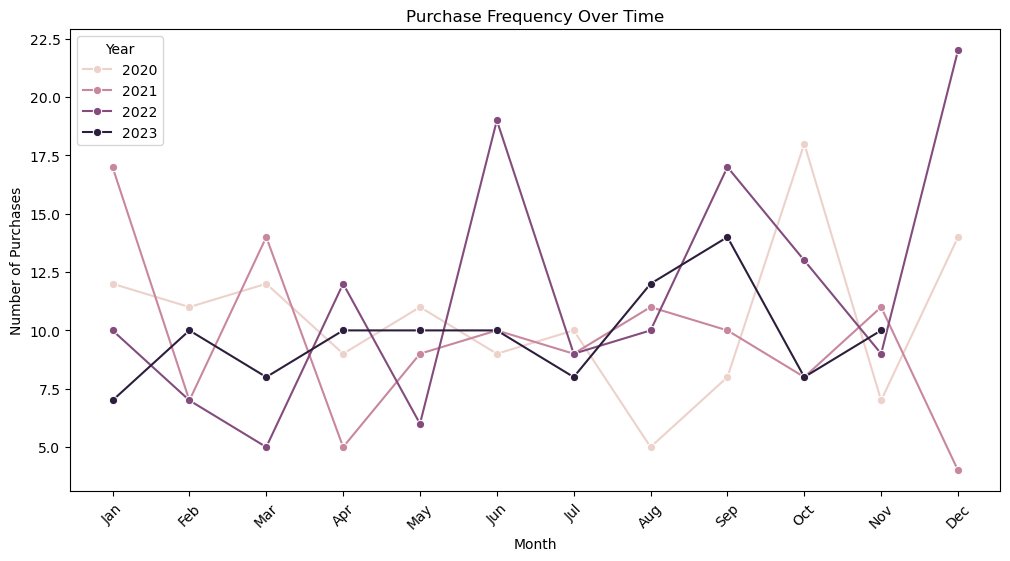

In [132]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=purchase_frequency, x='Month_Name', y='Transaction_ID', hue='Year', marker='o')
plt.title('Purchase Frequency Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

### Temporal Analysis for Average Spending over time 

#### Insights gained from each year:

**2020:**
peak occurs in March and june to July, decline occurs in August

**2021:**:
Exhibits sharp spikes in December. Slight peak in March and May. decline occurs in April.

**2022:**
A noticeable peak occurs in January and march, which decreases until a sharp decline in july.

**2023:**
Shows the strongest upward trend in April. Decline occurs in July. 

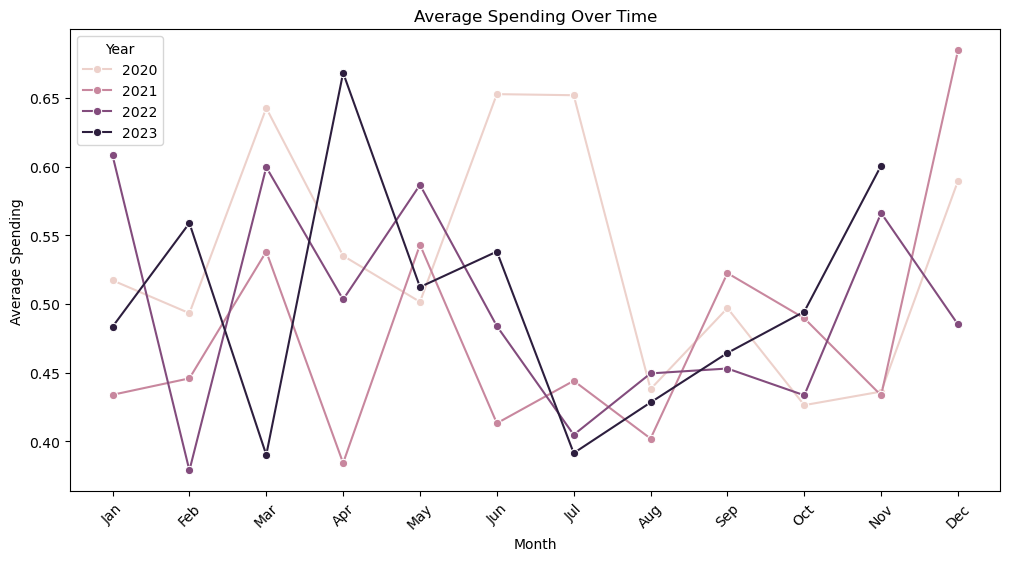

In [133]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_spending, x='Month_Name', y='Purchase_Amount', hue='Year', marker='o')
plt.title('Average Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

### Temporal Analysis of Product Frequency Over time

#### Insights gained from each year:


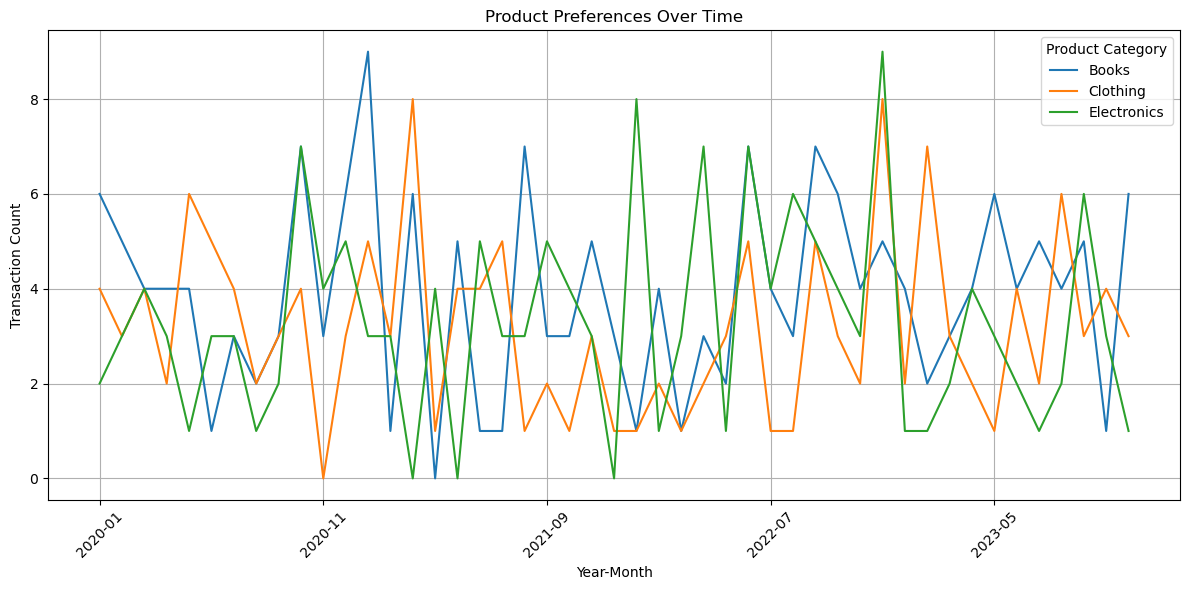

In [134]:
# Map product category
category_mapping = {
    0: 'Clothing',
    1: 'Electronics',
    2: 'Books'
}
df['Product_Category'] = df['Product_Category'].map(category_mapping)

# Create the YearMonth column
df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

# Group and plot product preferences
product_preferences = df.groupby(['YearMonth', 'Product_Category'])['Transaction_ID'].count().reset_index()
product_preferences_pivot = product_preferences.pivot(index='YearMonth', columns='Product_Category', values='Transaction_ID').fillna(0)

product_preferences_pivot.plot(kind='line', figsize=(12, 6))
plt.title('Product Preferences Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()
plt.show()


### Temporal Analysis of Seasonal Varaitions with respect to Product Category

This Shows seasonal variations in product preferences by showing the number of purchases across different product categories for each quarter.

- The total number of purchases (stack heights) is relatively stable across all four quarters, suggesting steady consumer demand throughout the year.

**Category Distribution:**
   - The blue section (Books) consistently accounts for the smallest share of purchases across all quarters.
   - The orange section (Clothing) has a moderate share in each quarter.
   - The green section (Electroics) consistently dominates, contributing the largest share of purchases.

**Seasonal Insights:**
   - proportional distribution of product categories seems steady, indicating no significant seasonal influence on product choice.

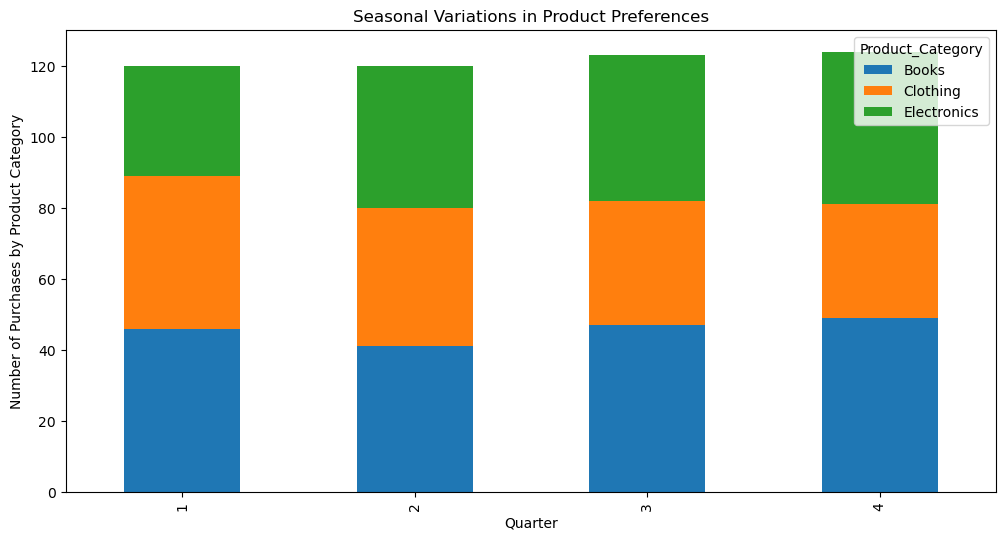

In [135]:

seasonal_variations = df.groupby(['Quarter', 'Product_Category'])['Transaction_ID'].count().unstack().fillna(0)
seasonal_variations = seasonal_variations.reset_index()

seasonal_variations.plot(x='Quarter', kind='bar', stacked=True, figsize=(12, 6))
plt.title('Seasonal Variations in Product Preferences')
plt.xlabel('Quarter')
plt.ylabel('Number of Purchases by Product Category')
plt.show()

# Module 3: Regression and Decision Tree Analysis:

## A. Linear Regression Analysis:

### Interpretation of the Results

#### 1. **Evaluation Metrics**
- **Mean Absolute Error (MAE):** `0.0714`
   - This value indicates that, on average, the model's predictions deviate from the actual `Purchase_Amount` by approximately 0.0714 units. A lower MAE suggests better model performance.
  
- **Mean Squared Error (MSE):** `0.00936`
   - MSE penalizes larger errors more heavily than MAE, providing insight into prediction consistency. A smaller MSE suggests the model is performing well.
  
- **R-squared (R²):** `0.8888`
   - R² measures how well the model explains the variability in the target variable. An R² of `0.8888` means approximately 88.88% of the variance in `Purchase_Amount` is explained by the features. This is a strong indication of a good fit.

#### 2. **Plot**

- **Actual vs. Predicted Purchase Amounts Plot**
   - The red dashed line represents the ideal case where predictions perfectly match the actual values.
   - The blue points mostly align with the red line, indicating good model accuracy.

#### Summary:
- **Strengths:**
  - High R² and low error metrics indicate the model performs well in predicting `Purchase_Amount`.

In [136]:
label_encoder = LabelEncoder()
df['Income_Level'] = label_encoder.fit_transform(df['Income_Level'])

# New Features
df['Age_Squared'] = df['Age'] ** 2  # Age squared
df['Income_Level_Squared'] = df['Income_Level'] ** 2  # Income Level squared
df['Age_Purchase_Interaction'] = df['Age'] * df['Purchase_Amount']  # Interaction between Age and Purchase Amount
df['Income_Age_Interaction'] = df['Income_Level'] * df['Age']  # Interaction between Income Level and Age

X = df[['Age', 'Income_Level', 'Age_Squared', 'Income_Level_Squared', 'Age_Purchase_Interaction', 'Income_Age_Interaction']]

y = df['Purchase_Amount']

imputer = SimpleImputer(strategy='median')  
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

#Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 0.07147083068051219
Mean Squared Error (MSE): 0.009358509538617128
R-squared: 0.8888272677414583


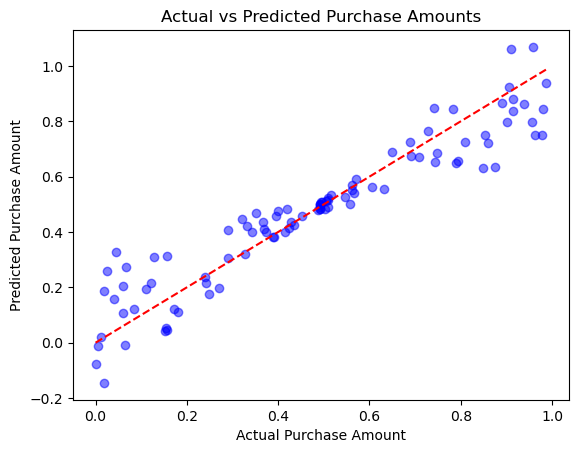

In [137]:
#Actual vs Predicted Purchase Amounts
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  
plt.title('Actual vs Predicted Purchase Amounts')
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.show()

## B. DECISION TREE ANALYSIS

### ANALYSIS OF METRICES 
- Accuracy: 92% - The model correctly predicts outcomes for 92% of the test data.It Measures the proportion of correct predictions (both Will Purchase and No Purchase) out of all predictions. 
- Precision: 92% - Out of all predicted Will Purchase, 92% were correct.
- Recall: 100% - The model identifies all actual Will Purchase cases correctly.
- F1 Score: 96% - The harmonic mean of precision and recall indicates a strong balance between them.Combines precision and recall into a single metric, balancing both.

### TREE ANALYSIS 

#### Root Node:

- Splits are based on Purchase_Frequency_Per_Month <= 0.056.
- Customers with very low purchase frequency are classified as No Purchase with entropy 0.0.

#### Left Subtree:
- If Purchase_Frequency_Per_Month is slightly higher but ≤ 0.167:
     - Most customers (42) are classified as Will Purchase.
     - For customers with lower brand affinity (Brand_Affinity_Score <= 0.056), some are further classified as No Purchase based on their age.

#### Right Subtree:
- Customers with a higher Purchase_Frequency_Per_Month are confidently classified as Will Purchase.
- Additional conditions like Brand_Affinity_Score refine predictions for edge cases, where customers with low scores may not purchase despite their frequency.

### IMPORTANT FEATURES 
- Purchase_Frequency_Per_Month: The most important predictor. Extremely low values strongly indicate no purchase.
- Brand_Affinity_Score: Customers with higher brand affinity scores are more likely to make a purchase.
- Age: Plays a role in edge cases, distinguishing between purchases when other features conflict.

### Predicting a Customer's Outcome
To predict using the decision tree:
  - Start at the root node and evaluate the first condition (e.g., Purchase_Frequency_Per_Month <= 0.056).
  - Follow the tree based on the feature thresholds until reaching a terminal node (Will Purchase or No Purchase).

Accuracy: 0.92
Precision: 0.92
Recall: 1.00
F1 Score: 0.96


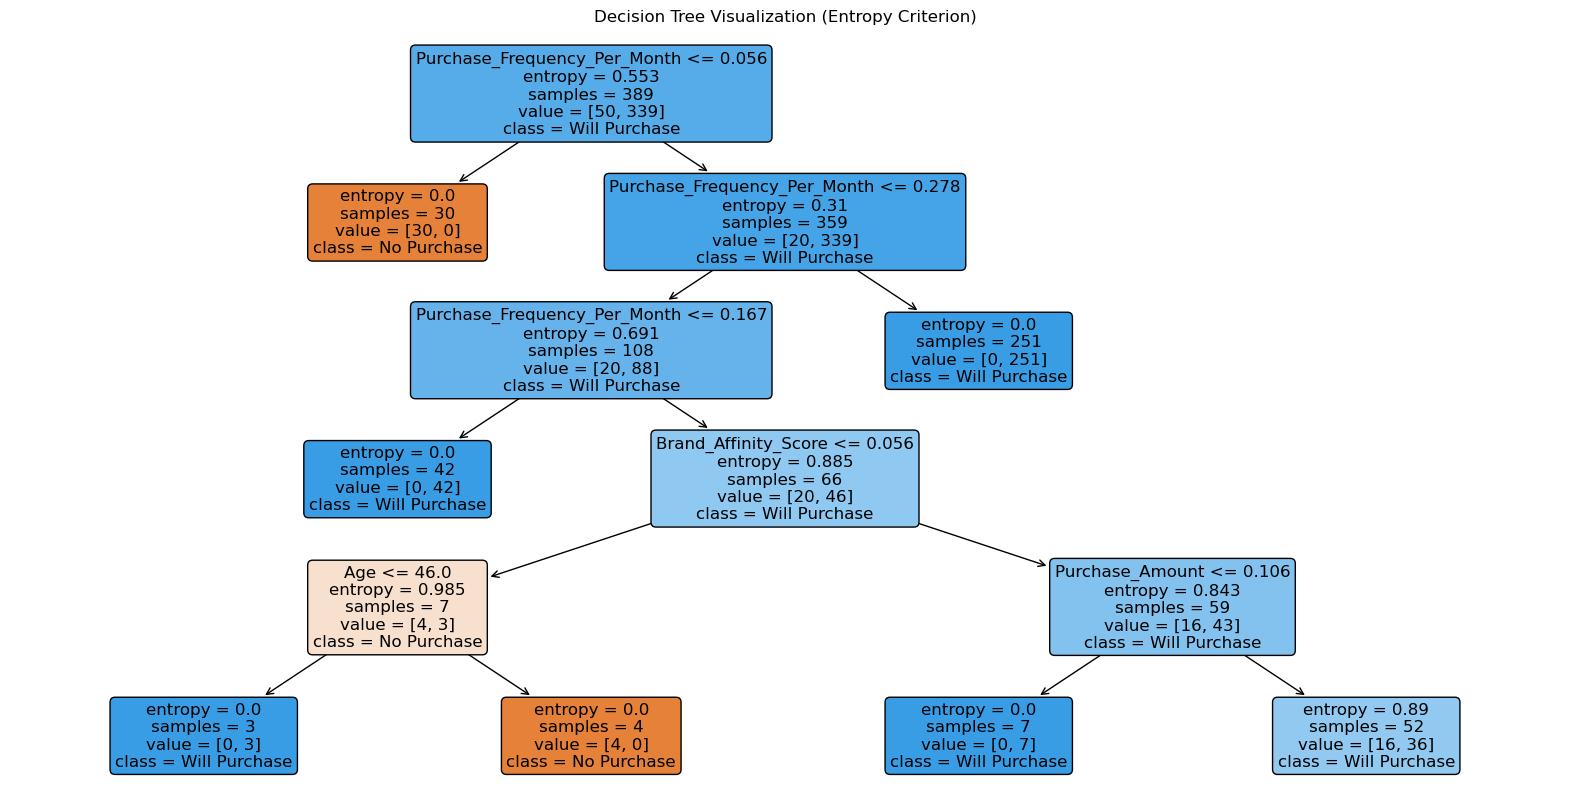

In [138]:
# Mapping categorical values to numeric values
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
income_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Income_Level_Numeric'] = df['Income_Level'].map(income_mapping)
product_category_prefrences_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Product_Category_Preference_Numeric'] = df['Product_Category_Preferences'].map(product_category_prefrences_mapping)

features = [
    'Age', 'Income_Level_Numeric', 'Purchase_Frequency_Per_Month', 'Purchase_Amount',
    'Average_Spending_Per_Purchase', 'Brand_Affinity_Score', 'Product_Category_Preference_Numeric'
]
target = 'Will_Purchase_Next_Month'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier using the entropy criterion
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Purchase', 'Will Purchase'], filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree Visualization (Entropy Criterion)')
plt.show()


# Module 4: Clustering Analysis:

### Analysis based on K clustering 

#### Cluster 0
Cluster 0 represents younger, middle-income customers with moderate purchase behaviors and specific product preferences.
- Spend moderately (0.44 normalized purchase amount) with relatively high average spending per purchase (0.52).- 
- Purchase frequency is moderately high (0.49).
- Lower brand affinity (0.42) but a strong preference for specific product categories (1.05).

#### Cluster 1
Cluster 1 represents older, high-income customers with a strong affinity for brands and consistent spending patterns.
- Slightly higher purchase amounts (0.47) but relatively lower average spending per purchase (0.49).
- Purchase frequency is moderate (0.47).
- Highest brand affinity ( approx 0.53) and moderately high product category preference (0.93).

#### Cluster 2
Cluster 2 represents older, lower-income customers who prioritize spending heavily despite limited resources
- Spend the most (0.50 normalized purchase amount) despite lower income.
- Average spending per purchase (0.49) and frequency (0.46) are moderate.
- Moderate brand affinity (0.48) and lower product category preferences (0.95).
- Very high age-purchase interaction (37.41).
- Moderate income-age interaction (33.31).


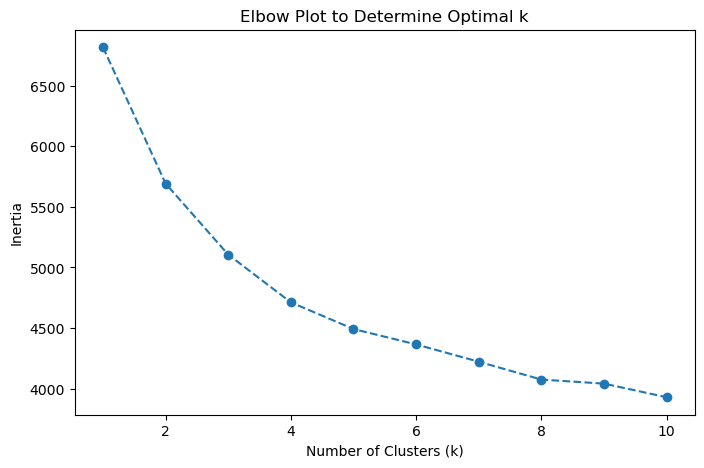

Optimal Number of Clusters (k): 3

Cluster Centroids (Manual Calculation):
          Age  Income_Level  Purchase_Amount  Average_Spending_Per_Purchase  \
0  32.333333      0.815920         0.444363                       0.527113   
1  58.751825      2.000000         0.472732                       0.493078   
2  64.496644      0.503356         0.596660                       0.497649   

   Purchase_Frequency_Per_Month  Brand_Affinity_Score  \
0                      0.492537              0.422333   
1                      0.473642              0.527981   
2                      0.469799              0.487696   

   Product_Category_Preferences    Season  Day_of_Week   Quarter  Age_Squared  \
0                      1.054726  1.452736     2.895522  2.492537  1159.069652   
1                      0.927007  1.445255     2.948905  2.503650  3629.262774   
2                      0.953020  1.516779     3.006711  2.557047  4271.973154   

   Income_Level_Squared  Age_Purchase_Interaction  Income

In [139]:
# Select the relevant columns for clustering
selected_columns = [
    "Age", "Income_Level", "Purchase_Amount", 
    "Average_Spending_Per_Purchase", "Purchase_Frequency_Per_Month", 
    "Brand_Affinity_Score", "Product_Category_Preferences", "Season",
    "Day_of_Week", "Quarter", "Age_Squared", "Income_Level_Squared",
    "Age_Purchase_Interaction", "Income_Age_Interaction"
]
X = df[selected_columns]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)  # Test 1 to 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Plot to Determine Optimal k")
plt.show()


optimal_k = 3 #from elbow plot

# Apply K-Means with Optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate Centroids Manually Using Euclidean Distance Formula
def calculate_centroids(X_scaled, labels, n_clusters):
    """
    Calculate the centroids of clusters using Euclidean distance.
    """
    centroids = []
    for cluster in range(n_clusters):
        cluster_points = X_scaled[labels == cluster]  
        centroid = np.mean(cluster_points, axis=0)  # Calculate mean along each feature
        centroids.append(centroid)
    return np.array(centroids)

labels = kmeans.labels_
centroids = calculate_centroids(X_scaled, labels, optimal_k)

# Centroids in Original Scale
centroids_original_scale = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids_original_scale, columns=selected_columns)

# Analyze Cluster Characteristics
cluster_summary = df.groupby('Cluster')[selected_columns].mean()

# Display Results
print("Optimal Number of Clusters (k):", optimal_k)
print("\nCluster Centroids (Manual Calculation):\n", centroids_df)
print("\nCluster Characteristics:\n", cluster_summary)


### Elbow Plot Interpretation:

1. **Observation**:
   - The plot shows a sharp decline in inertia as the number of clusters (`k`) increases from 1 to 3.
   - After **k=3**, the rate of decrease in inertia slows significantly, forming an "elbow" shape in the graph.

2. **Optimal Number of Clusters (`k`)**:
   - The "elbow" in the plot occurs at **k=3**, indicating that **3 clusters** are optimal for this dataset.
   - At this point, adding more clusters provides diminishing returns in terms of reducing inertia, making further increases inefficient and less meaningful.

3. **What This Means**:
   - With **3 clusters**, the dataset is effectively segmented into distinct groups based on the provided variables:
     - **Age**
     - **Income_Level**
     - **Purchase_Amount**
     - **Average_Spending_Per_Purchase**
     - **Purchase_Frequency_Per_Month**
     - **Brand_Affinity_Score**
     - **Product_Category_Preferences**
   - These clusters represent groups with distinct behaviors, preferences, or characteristics, such as:
     - High-income, high-spending individuals.
     - Moderate-income, average-purchasing customers.
     - Low-income, frequent but low-value buyers.

4. **Choosing 3 clusters**:
   - **Simplicity vs. Complexity**: At **k=3**, the clusters balance interpretability and compactness. Using more clusters (e.g., k=4 or 5) might overfit the data or lead to overly granular segments with less practical value.
   - **Business Insights**: Three clusters offer a manageable framework for analysis, allowing actionable insights without unnecessary complexity.


### Analysis based on K clustering 

#### Cluster 0
Cluster 0 represents younger, middle-income customers with moderate purchase behaviors and specific product preferences.
- Spend moderately (0.44 normalized purchase amount) with relatively high average spending per purchase (0.52).- 
- Purchase frequency is moderately high (0.49).
- Lower brand affinity (0.42) but a strong preference for specific product categories (1.05).
- Moderate age-purchase interaction (13.57).
- Income-age interaction is relatively low (24.71).

#### Cluster 1
Cluster 1 represents older, high-income customers with a strong affinity for brands and consistent spending patterns.
- Slightly higher purchase amounts (0.47) but relatively lower average spending per purchase (0.49).
- Purchase frequency is moderate (0.47).
- Highest brand affinity (0.53) and moderately high product category preference (0.93
- High age-purchase interaction (27.47).
- Extremely high income-age interaction (117.50).

#### Cluster 2
Cluster 2 represents older, lower-income customers who prioritize spending heavily despite limited resources
- Spend the most (0.60 normalized purchase amount) despite lower income.
- Average spending per purchase (0.49) and frequency (0.46) are moderate.
- Moderate brand affinity (0.48) and lower product category preferences (0.95).
- Very high age-purchase interaction (37.41).
- Moderate income-age interaction (33.31).


Actionable Recommendations
Cluster 0: Target with promotions on specific product categories, as they demonstrate clear preferences.
Cluster 1: Focus on premium brand partnerships and loyalty programs, catering to their high brand affinity.
Cluster 2: Develop budget-friendly options with high perceived value to align with their spending habits despite lower incomes.

